<a href="https://colab.research.google.com/github/binodsth2/Blood_Sugar_Detection_using_machine_Learning/blob/main/Sugar_Level_detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:

#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [15]:
# Uploading the dataset
df=pd.read_csv('/content/drive/MyDrive/Machine_Learning/diabetes.csv')
df.shape
df.head()
#df.tail()
#df.info()

# Here the data in clear so we donot need to purify the data further so Directly the further process is started.


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [17]:
x=df.drop('Diabetes_012', axis=1)
y=df['Diabetes_012']

In [18]:
#Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

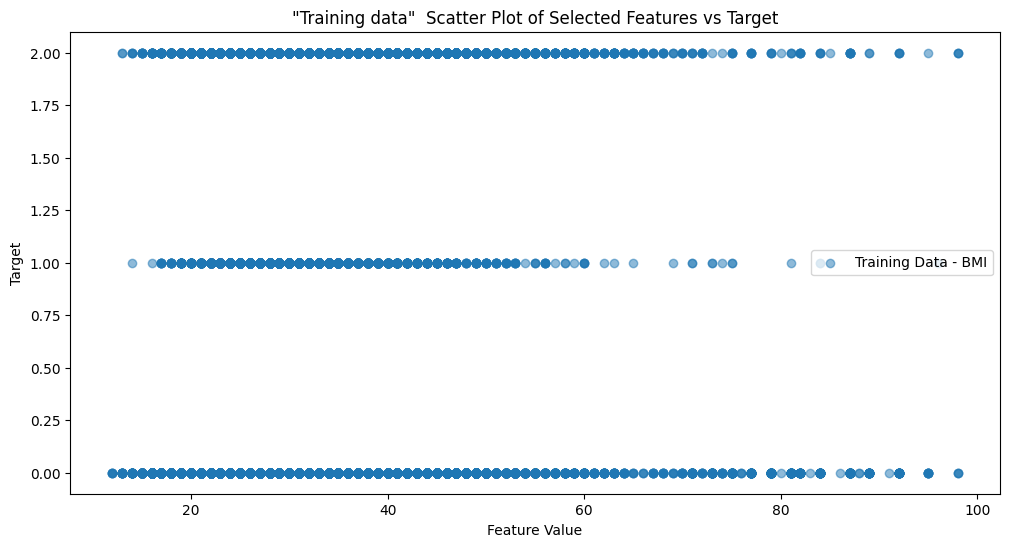

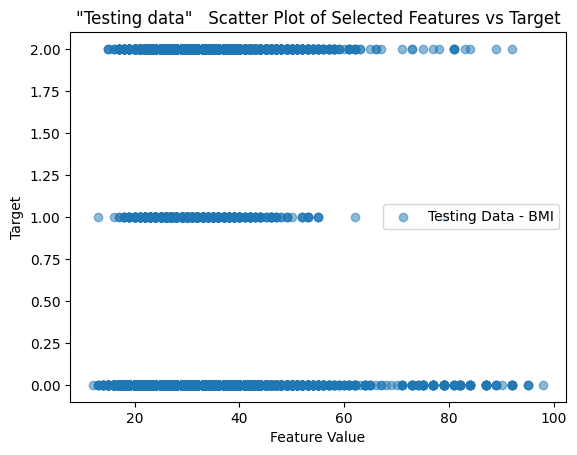

In [19]:
#Scatter plt
plt.figure(figsize=(12, 6))

# Select a few columns for plotting
cols_to_plot = ['BMI', 'BloodPressure', 'Glucose']

for col in cols_to_plot:
    if col in x_train.columns and col in x_test.columns:
        plt.scatter(x_train[col], y_train, label=f'Training Data - {col}', alpha=0.5)
        #plt.scatter(X_test[col], y_test, label=f'Testing Data - {col}', alpha=0.5)

plt.title('"Training data"  Scatter Plot of Selected Features vs Target')
plt.xlabel('Feature Value')
plt.ylabel('Target')
plt.legend()
plt.show()


for col in cols_to_plot:
    if col in x_train.columns and col in x_test.columns:
        #plt.scatter(X_train[col], y_train, label=f'Training Data - {col}', alpha=0.5)
        plt.scatter(x_test[col], y_test, label=f'Testing Data - {col}', alpha=0.5)

plt.title('"Testing data"   Scatter Plot of Selected Features vs Target')
plt.xlabel('Feature Value')
plt.ylabel('Target')
plt.legend()
plt.show()

In [20]:
# * Scaling features *
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)
# Display the first few rows of the scaled training data
print("First 5 rows of scaled training data:")
print(x_train_scaled[:5])

First 5 rows of scaled training data:
[[-0.86538956  1.16634595  0.19670545 -1.26609183  1.12161459 -0.20565477
  -0.3225563   0.56644773  0.75912866  0.48154168 -0.24397107  0.22692747
  -0.30303553 -0.47913599 -0.4299017  -0.48719672 -0.44984481  1.12717535
   1.29940106  0.96217369  0.93970698]
 [-0.86538956 -0.85737855  0.19670545  0.85115244 -0.89157185 -0.20565477
  -0.3225563   0.56644773 -1.31729976  0.48154168 -0.24397107  0.22692747
  -0.30303553  0.45698576 -0.4299017  -0.48719672 -0.44984481  1.12717535
  -0.01075203 -0.05130201  0.93970698]
 [ 1.15554895  1.16634595  0.19670545 -0.6611649  -0.89157185 -0.20565477
  -0.3225563   0.56644773  0.75912866  0.48154168 -0.24397107  0.22692747
  -0.30303553 -0.47913599 -0.4299017   0.08613942 -0.44984481  1.12717535
   1.29940106 -0.05130201 -0.02538708]
 [-0.86538956  1.16634595  0.19670545 -0.20746969 -0.89157185 -0.20565477
  -0.3225563   0.56644773  0.75912866  0.48154168 -0.24397107  0.22692747
  -0.30303553 -1.41525775 -0.42

In [21]:
#labelencoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [ ]:
from sklearn.metrics import f1_score
# ...existing code...

#Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(x_train_scaled, y_train)
lr_pred = lr_model.predict(x_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression F1-score:", f1_score(y_test, lr_pred, average='weighted'))

# RandomForest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(x_train_scaled, y_train)
rf_pred = rf_model.predict(x_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest F1-score:", f1_score(y_test, rf_pred, average='weighted'))

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train_scaled, y_train)
xgb_pred = xgb_model.predict(x_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost F1-score:", f1_score(y_test, xgb_pred, average='weighted'))

# Bagging Classifier
bag_model = BaggingClassifier(n_estimators=100, random_state=42)
bag_model.fit(x_train_scaled, y_train)
bag_pred = bag_model.predict(x_test_scaled)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, bag_pred))
print("Bagging Classifier F1-score:", f1_score(y_test, bag_pred, average='weighted'))

# # Ensemble Bagged Trees
# et_model = BaggingClassifier(RandomForestClassifier(), n_estimators=100, random_state=42)
# et_model.fit(x_train_scaled, y_train)
# et_pred = et_model.predict(x_test_scaled)
# print("Ensemble Bagged Trees Accuracy:", accuracy_score(y_test, et_pred))
# print("Ensemble Bagged Trees F1-score:", f1_score(y_test, et_pred, average='weighted'))

# # Coarse Gaussian SVM
# from sklearn.svm import SVC
# svm_model = SVC(kernel='rbf', class_weight='balanced')
# svm_model.fit(x_train_scaled, y_train)
# svm_pred = svm_model.predict(x_test_scaled)
# print("Coarse Gaussian SVM Accuracy:", accuracy_score(y_test, svm_pred))
# print("Coarse Gaussian SVM F1-score:", f1_score(y_test, svm_pred, average='weighted'))

# # Ensemble Subspace KNN
# from sklearn.neighbors import KNeighborsClassifier
# knn_model = KNeighborsClassifier()
# knn_model.fit(x_train_scaled, y_train)
# knn_pred = knn_model.predict(x_test_scaled)
# print("Ensemble Subspace KNN Accuracy:", accuracy_score(y_test, knn_pred))
# print("Ensemble Subspace KNN F1-score:", f1_score(y_test, knn_pred, average='weighted'))

# # Fine Trees
# ft_model = RandomForestClassifier(n_estimators=100, random_state=42)
# ft_model.fit(x_train_scaled, y_train)
# ft_pred = ft_model.predict(x_test_scaled)
# print("Fine Trees Accuracy:", accuracy_score(y_test, ft_pred))
# print("Fine Trees F1-score:", f1_score(y_test, ft_pred, average='weighted'))

Logistic Regression Accuracy: 0.6477057710501419
Logistic Regression F1-score: 0.722358274769652
Random Forest Accuracy: 0.8383790602333648
Random Forest F1-score: 0.8016687269142604


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:23:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8504415011037527
XGBoost F1-score: 0.8142274806945754


In [10]:


# Ensemble Subspace KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)
knn_pred = knn_model.predict(x_test_scaled)
print("Ensemble Subspace KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Ensemble Subspace KNN F1-score:", f1_score(y_test, knn_pred, average='weighted'))

# Fine Trees
ft_model = RandomForestClassifier(n_estimators=100, random_state=42)
ft_model.fit(x_train_scaled, y_train)
ft_pred = ft_model.predict(x_test_scaled)
print("Fine Trees Accuracy:", accuracy_score(y_test, ft_pred))
print("Fine Trees F1-score:", f1_score(y_test, ft_pred, average='weighted'))

# Coarse Gaussian SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', class_weight='balanced')
svm_model.fit(x_train_scaled, y_train)
svm_pred = svm_model.predict(x_test_scaled)
print("Coarse Gaussian SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Coarse Gaussian SVM F1-score:", f1_score(y_test, svm_pred, average='weighted'))



Ensemble Subspace KNN Accuracy: 0.8302980132450332
Ensemble Subspace KNN F1-score: 0.8017763600743573
Fine Trees Accuracy: 0.8410990223904131
Fine Trees F1-score: 0.8076377358643425
Coarse Gaussian SVM Accuracy: 0.6420490381583097
Coarse Gaussian SVM F1-score: 0.7145876467477487


In [11]:
#Making prediction
y_pred = xgb_model.predict(x_test_scaled)

In [12]:
# * Evaluate the model *
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8504415011037527

Confusion Matrix:
 [[41763     1  1031]
 [  848     0    96]
 [ 5612     0  1385]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     42795
           1       0.00      0.00      0.00       944
           2       0.55      0.20      0.29      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.81      0.85      0.81     50736



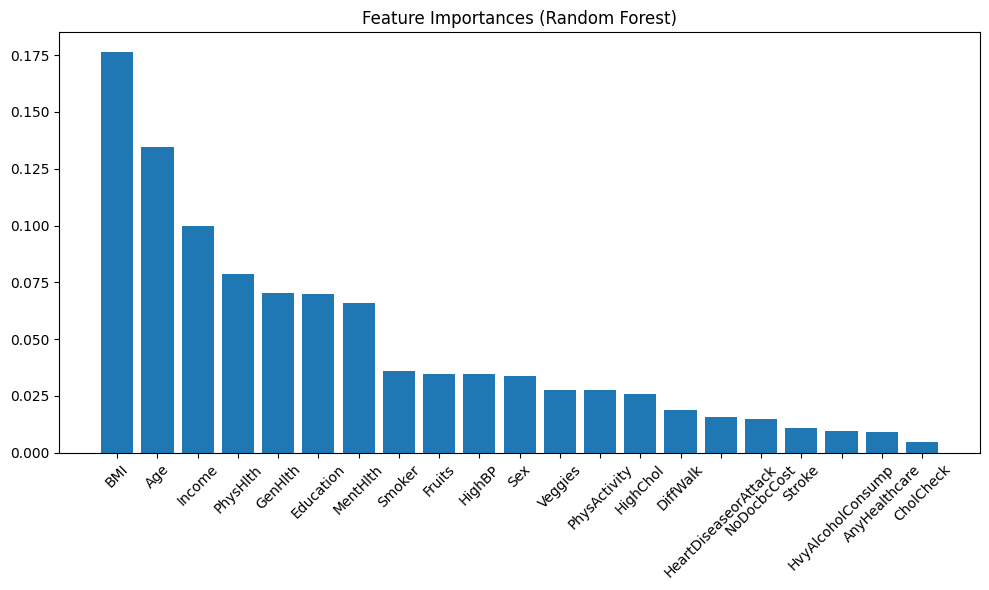

In [13]:

# Feature Importance Visualization for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = x.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()